# K-Nearest Neighbors (KNN) ile Iris Çiçek Sınıflandırması

## Gerekli Kütüphanelerin İçe Aktarılması

In [40]:
# Veri seti ve temel kütüphaneler
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
# Model ve değerlendirme metrikleri
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

## Veri Seti İncelemesi

### Veri Setinin Yüklenmesi  
-Iris veri seti, makine öğrenmesinde en çok kullanılan klasik veri setlerinden biridir.  
-150 iris çiçeği örneği ve 4 özellik içerir.  
-3 farklı iris türü vardır: Setosa, Versicolor, Virginica.  
-Özellikler: sepal length, sepal width, petal length, petal width 

In [41]:
iris = load_iris()

#Veri setini DataFrame'e dönüştürme
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target

In [42]:
#Hedef değişken etiketlerini ekleme (0: setosa, 1: versicolor, 2: virginica)
df["species"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [43]:
print("Veri Seti Boyutu:", df.shape)
print("\nİlk 5 Satır:", df.head())

Veri Seti Boyutu: (150, 6)

İlk 5 Satır:    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [ ]:
#Eksik değer kontrolü
df.isnull().sum() 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [45]:
#Sayısal özet
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Veri Hazırlığı-Model Eğitimi

In [47]:
#Özellikler (X) ve hedef değişken (y) ayrımı
X = iris.data
y = iris.target

In [48]:
#Veri setini train ve test olarak bölme (%70 train, %30 test)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)
print("Train seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)

Train seti boyutu: (105, 4)
Test seti boyutu: (45, 4)


In [49]:
#Ölçeklendirme
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)  #Train verisi üzerinde öğren ve dönüştür
X_test= scaler.transform(X_test) #Test verisini sadece dönüştür 

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [51]:
#Test verisi üzerinde tahmin yapma
y_pred = knn.predict(X_test)

In [52]:
#Doğruluk skoru hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Test Doğruluğu:",accuracy)

Test Doğruluğu: 0.9111111111111111


In [53]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  4, 11]])

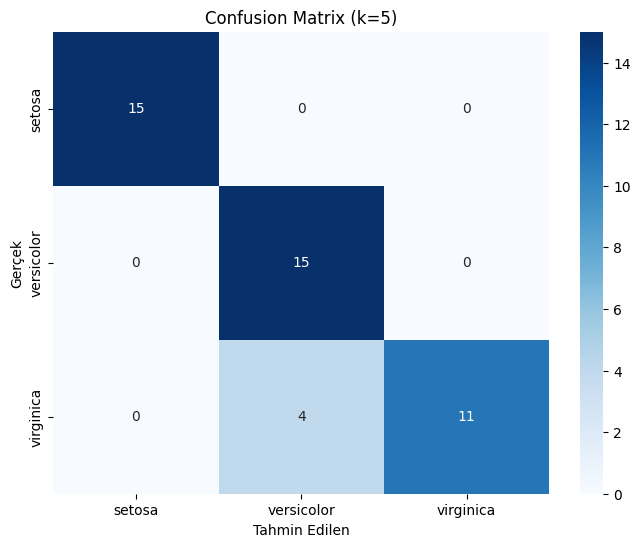

In [54]:
#Confusion Matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix (k=5)')
plt.show()

## Hiperparametre Ayarlaması  
-Farklı k değerleri için model performansını karşılaştırıyoruz  
-Hem train hem test doğruluğunu izleyerek overfitting'i kontrol ediyoruz

In [55]:
train_accuracy_values = []
test_accuracy_values = []
k_values = list(range(1, 31))

In [56]:
for k in k_values:
    #Her k değeri için yeni model oluştur
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    
    #Train ve test doğruluğunu hesapla
    train_acc = knn_temp.score(X_train, y_train)
    test_acc = knn_temp.score(X_test, y_test)
    
    train_accuracy_values.append(train_acc)
    test_accuracy_values.append(test_acc)

In [ ]:
#En iyi k değerini bulma
best_k = k_values[test_accuracy_values.index(max(test_accuracy_values))]
best_accuracy = max(test_accuracy_values)
print(f"\nEn İyi k Değeri: {best_k}")
print(f"En Yüksek Test Doğruluğu: {round(best_accuracy, 4)}")


En İyi k Değeri: 9
En Yüksek Test Doğruluğu: 0.9556


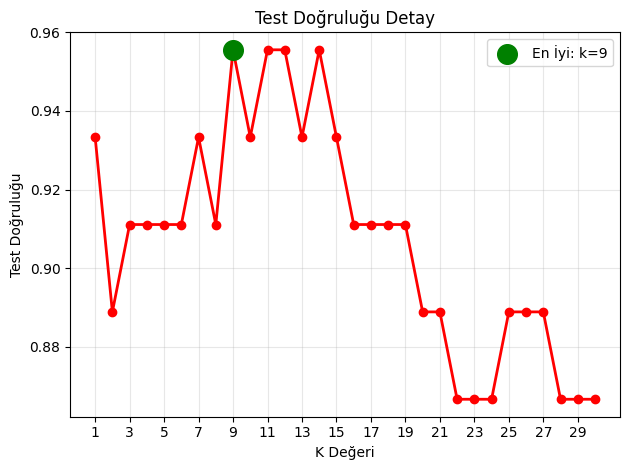

In [58]:
#Gorsellestirme
plt.plot(k_values, test_accuracy_values, marker="o", linestyle="-", 
         color="red", linewidth=2)
plt.scatter([best_k], [best_accuracy], color='green', s=200, 
            zorder=5, label=f'En İyi: k={best_k}')
plt.title("Test Doğruluğu Detay")
plt.xlabel("K Değeri")
plt.ylabel("Test Doğruluğu")
plt.xticks(range(1, 31, 2))
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [59]:
#En iyi k değeri ile modeli eğit
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
final_pred = knn.predict(X_test)

print(f"Test Doğruluğu: {round(accuracy_score(y_test, final_pred), 4)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, final_pred))

Test Doğruluğu: 0.9556

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
